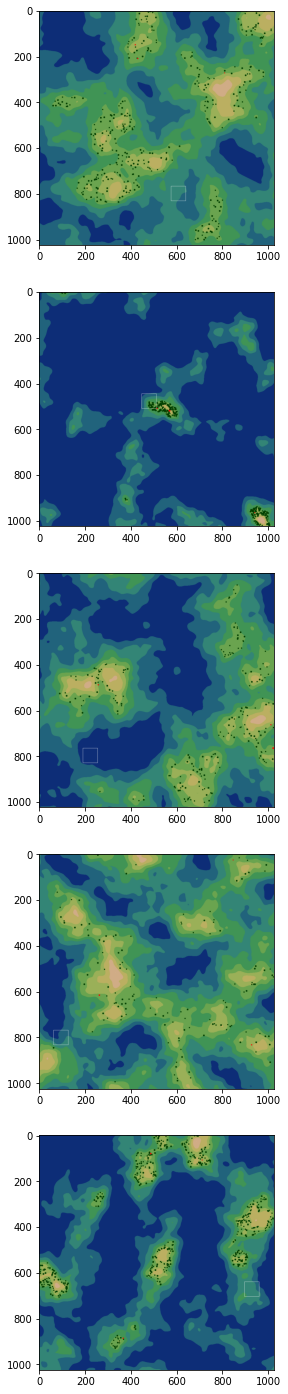

In [31]:
%matplotlib inline

import gym
import gym_search
import numpy as np
import matplotlib.pyplot as plt

n = 5
env = gym.make("SearchTerrain-v0")

seeds = list(range(n))

fig, axs = plt.subplots(n, figsize=(5, 5*n))

for ax, seed in zip(axs, seeds):
    env.seed(seed)
    env.reset()
    img = env.render()
    ax.imshow(img)
